In [ ]:
import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sea

from sklearn.cluster import KMeans #<<<
from kmodes.kprototypes import KPrototypes #<<<Our methods
from kmodes.kmodes import KModes#<<<

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer #For normalizing numerical data


import scipy.cluster.hierarchy as sc
from collections import Counter

#Importing individual Book CSVs
d1 = panda.read_csv("mystery books.csv")
d2 = panda.read_csv("education books.csv")
d3 = panda.read_csv("cooking books.csv")
d4 = panda.read_csv("fantasy books.csv")
d5 = panda.read_csv("travel books.csv")
d6 = panda.read_csv("romance books.csv")


plt.style.use('seaborn')

In [6]:

frames = [d1, d2, d3, d4, d5, d6]

In [7]:
books = panda.concat(frames) #Combining all CSVs into a single data frame

books[books.isna().any(axis=1)] #Checking for Null Values, NaN

,Title,Date Published,Reviews,Author(s),Genre,Type,Format


In [8]:
books["Reviews"].max() #Seeing our highest review to so can create more accurate ranges

61077

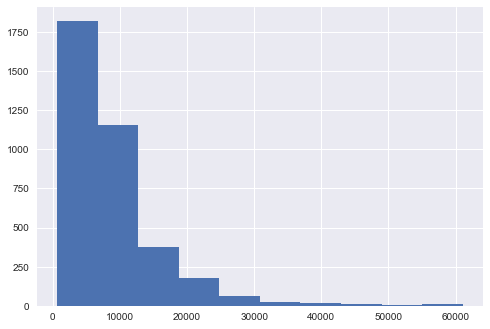

In [11]:
def sorting(df): #This creates the bins used for generally ranking each book
    names = ["Niche","Average","Good", "Great","Outstanding", "Special"]
    ranges = [0, 2500, 5000, 10000, 20000, 40000, 65000]
    df["Ranking"] = panda.cut(df["Reviews"], ranges, labels = names)
    return df

booksort = sorting(books)
booksort.dropna()

booksr = plt.subplot()
plt.hist(booksort.Reviews)
plt.show()

In [12]:
Counter(booksort["Ranking"])

Counter({'Good': 1052,
         'Great': 775,
         'Outstanding': 242,
         'Niche': 1112,
         'Average': 451,
         'Special': 33})

In [94]:
meancluster = KMeans(n_clusters = 6) #We'll assume this number of Clusters will give us good range
kmean = meancluster.fit_predict(booksort[["Reviews",]])

booksmean = booksort.copy() #Copy of Sorted Data Frame
booksmean["RCluster"] = kmean #Adding Cluster to Copy

In [95]:
booksmean["RCluster"].value_counts()

0    1563
3    1176
1     554
4     256
5      84
2      32
Name: RCluster, dtype: int64

In [96]:
booksort.sample(20)
#Not much can be done with the Kmeans Clusters, they all fit in specific locations.
#There isn't much numerical data to factor in.

,Title,Date Published,Reviews,Author(s),Genre,Type,Format,Ranking
344,One Bossy Dare: An Enemies to Lovers Romance,2022,9557,Nicole Snow,Romance,Non Fiction,Hardcover,Good
425,Haunting Adeline (Cat and Mouse Duet),2021,16146,H. D. Carlton,Mystery,Non Fiction,Hardcover,Great
13,The Perfect Hope (Inn BoonsBoro),2014,6468,Nora Roberts,Romance,Fiction,Audio CD,Good
479,Medical Medium Life-Changing Foods: Save Yours...,2016,8049,Anthony William,Cooking & Health,Non Fiction,Hardcover,Good
118,Fossil Future: Why Global Human Flourishing Re...,2022,987,Alex Epstein,Education & History,Non Fiction,Audio CD,Niche
1,Longstone: A DCI Ryan Mystery (The DCI Ryan My...,2018,7792,LJ Ross,Mystery,Fiction,Audio CD,Good
317,Barbarian Alien (Ice Planet Barbarians),2022,9445,Ruby Dixon,Romance,Fiction,Hardcover,Good
175,The Curry Guy Bible: Recreate Over 200 Indian ...,2021,2730,Dan Toombs,Cooking & Health,Non Fiction,Audio CD,Average
569,The Final Frontiersman: Heimo Korth and His Fa...,2005,2160,James Campbell,Travel,Non Fiction,Hardcover,Niche
417,"Four Seasons in Rome: On Twins, Insomnia, and ...",2008,1275,Anthony Doerr,Travel,Non Fiction,Paperback,Niche


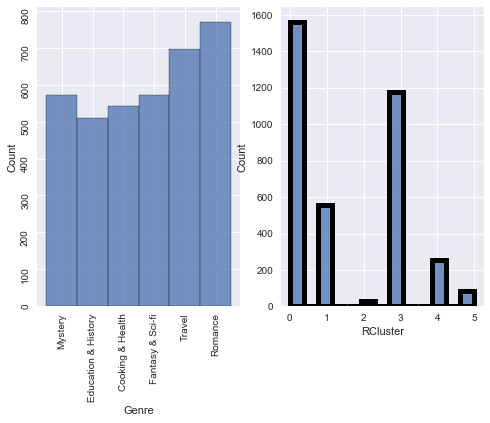

In [97]:
fig, (rr1, rr2) = plt.subplots(1,2)

rcluster = sea.histplot(booksmean.RCluster, linewidth = 5, ax = rr2)
genre = sea.histplot(booksmean.Genre, ax = rr1)

genre.tick_params(labelrotation = 90)


In [98]:
booksmode = booksort.copy() #New copy for KMode Clustering
booksless = booksort[["Genre", "Type", "Format","Ranking"]]
booksmode.head

<bound method NDFrame.head of                                                  Title  Date Published  \
0                 Deadly Fallout (Detective Zoe Finch)            2021   
1    Longstone: A DCI Ryan Mystery (The DCI Ryan My...            2018   
2               Next to Last Stand: A Longmire Mystery            2021   
3                    Swansong (DI Nick Dixon Crime, 4)            2015   
4         Piece of My Heart (An Under Suspicion Novel)            2021   
..                                                 ...             ...   
765                                              Layla            2020   
766                         People We Meet on Vacation            2021   
767                                        Book Lovers            2022   
768                                 From Blood and Ash            2021   
769        Bridgerton [TV Tie-in] (Bridgertons Book 1)            2020   

     Reviews               Author(s)    Genre         Type     Format  Ranking  


In [25]:
booksless.head

<bound method NDFrame.head of        Genre         Type     Format  Ranking
0    Mystery      Fiction  Paperback     Good
1    Mystery      Fiction   Audio CD     Good
2    Mystery      Fiction  Hardcover     Good
3    Mystery  Non Fiction  Paperback     Good
4    Mystery      Fiction   Audio CD     Good
..       ...          ...        ...      ...
765  Romance      Fiction  Paperback  Special
766  Romance  Non Fiction   Audio CD  Special
767  Romance      Fiction  Hardcover  Special
768  Romance  Non Fiction  Paperback  Special
769  Romance      Fiction   Audio CD  Special

[3665 rows x 4 columns]>

In [26]:
encoder = preprocessing.LabelEncoder() #Normalizing our labels
enmode = booksmode.apply(encoder.fit_transform)
lessmode = booksless.apply(encoder.fit_transform)
enmode.head()

,Title,Date Published,Reviews,Author(s),Genre,Type,Format,Ranking
0,648,48,1644,1489,3,0,2,1
1,1378,45,1649,1065,3,0,0,1
2,1588,48,1638,368,3,0,1,1
3,2086,42,1643,382,3,1,2,1
4,1744,48,1626,1214,3,0,0,1


In [30]:
lessmode.sample(10)

,Genre,Type,Format,Ranking
357,4,0,2,1
102,2,0,2,1
582,4,1,2,2
540,5,0,2,3
313,5,1,0,3
436,2,1,0,2
230,4,1,1,1
437,3,1,1,2
171,2,1,2,1
92,3,1,1,1


In [330]:
#Different Initiailizations of K-Mode
khuang = KModes(n_clusters = 10, init = "Huang", n_init = 4)
kcao = KModes(n_clusters = 10, init = "Cao", n_init = 4) #Default Initialization
krandom = KModes(n_clusters = 10, init = "random", n_init = 4)

enhuang = khuang.fit_predict(enmode[["Title","Author(s)","Genre","Type","Format"]])
encao = kcao.fit_predict(enmode[["Title","Author(s)","Genre","Type","Format"]])
enrandom = krandom.fit_predict(enmode[["Title","Author(s)","Genre","Type","Format"]])

lesshuang = khuang.fit_predict(lessmode)
lesscao = kcao.fit_predict(lessmode)
lessrandom = krandom.fit_predict(lessmode)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 135, cost: 10018.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 228, cost: 9720.0
Run 2, iteration: 2/100, moves: 0, cost: 9720.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 850, cost: 9950.0
Run 3, iteration: 2/100, moves: 82, cost: 9847.0
Run 3, iteration: 3/100, moves: 143, cost: 9846.0
Run 3, iteration: 4/100, moves: 0, cost: 9846.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 562, cost: 9796.0
Run 4, iteration: 2/100, moves: 94, cost: 9796.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 621, cost: 6910.0
Run 1, iteration: 2/100, moves: 220, cost: 6584.0
Run 1, iteration: 3/100, moves: 5

In [331]:
#Adding on to Data Frames as Columns
enmode["Huang"] = enhuang
enmode["Cao"] = encao
enmode["Random"] = enrandom

lessmode["Huang"] = lesshuang
lessmode['Cao'] = lesscao
lessmode['Random'] = lessrandom

#Back to original Data Frame
booksmode["E Huang"] = enhuang
booksmode['E Cao'] = encao
booksmode['E Random'] = enrandom
booksmode["L Huang"] = lesshuang
booksmode['L Cao'] = lesscao
booksmode['L Random'] = lessrandom

In [332]:
booksmode.head()

,Title,Date Published,Reviews,Author(s),Genre,Type,Format,Ranking,E Huang,E Cao,E Random,L Huang,L Cao,L Random
0,Deadly Fallout (Detective Zoe Finch),2021,7767,Rachel McLean,Mystery,Fiction,Paperback,Good,4,5,7,2,9,2
1,Longstone: A DCI Ryan Mystery (The DCI Ryan My...,2018,7792,LJ Ross,Mystery,Fiction,Audio CD,Good,7,1,7,6,1,5
2,Next to Last Stand: A Longmire Mystery,2021,7751,Craig Johnson,Mystery,Fiction,Hardcover,Good,0,2,3,2,8,3
3,"Swansong (DI Nick Dixon Crime, 4)",2015,7762,Damien Boyd,Mystery,Non Fiction,Paperback,Good,0,0,3,5,2,0
4,Piece of My Heart (An Under Suspicion Novel),2021,7712,Mary Higgins Clark,Mystery,Fiction,Audio CD,Good,7,1,7,6,1,5


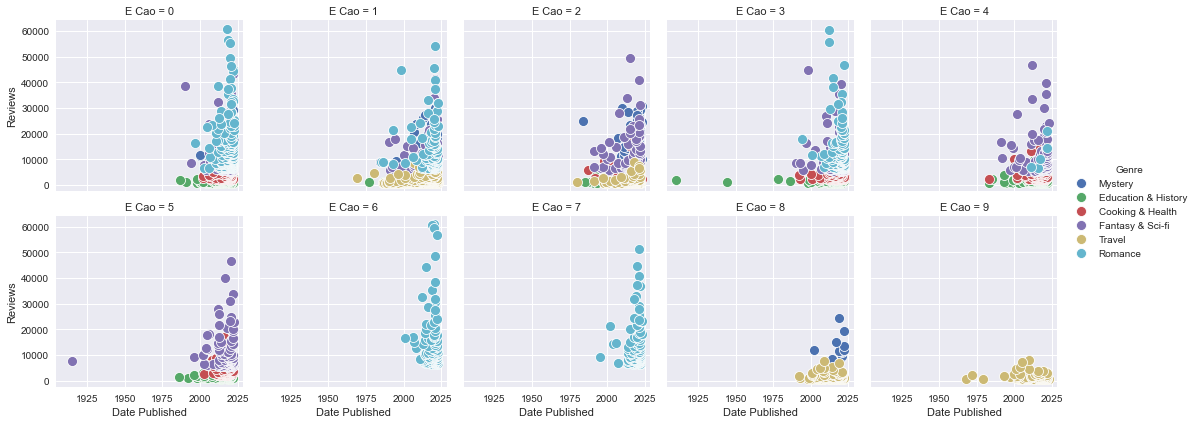

In [272]:
#Illustrating E Cao Scatter for each based on Date and Review Number
grid = sea.FacetGrid(booksmode, col = "E Cao" , hue = "Genre", col_wrap = 5)
grid.map(sea.scatterplot,"Date Published","Reviews", s = 100)
grid.add_legend()

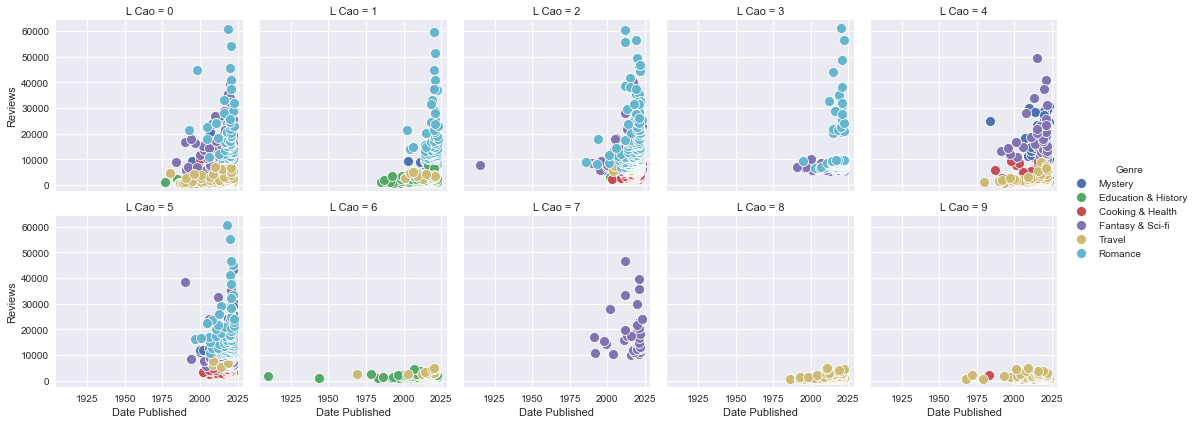

In [273]:
#Illustrating L Cao Scatter for each based on Date and Review Number
grid = sea.FacetGrid(booksmode, col = "L Cao" , hue = "Genre", col_wrap = 5)
grid.map(sea.scatterplot,"Date Published","Reviews", s = 100)
grid.add_legend()

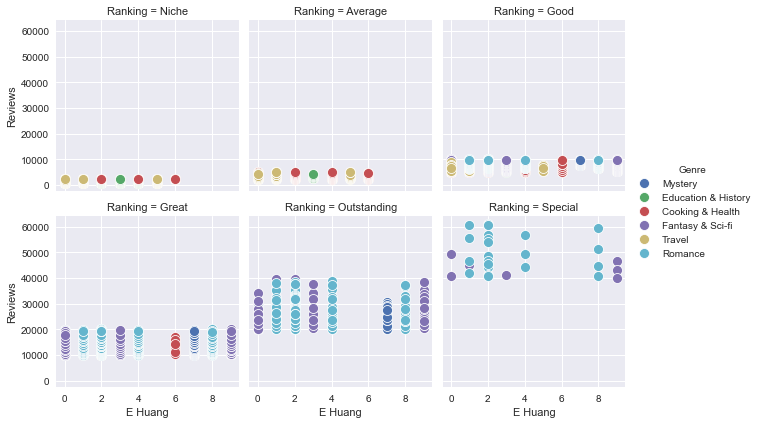

In [333]:
grid = sea.FacetGrid(booksmode, col = "Ranking" , hue = "Genre", col_wrap = 3)
grid.map(sea.scatterplot,"E Huang","Reviews", s = 100)
grid.add_legend()

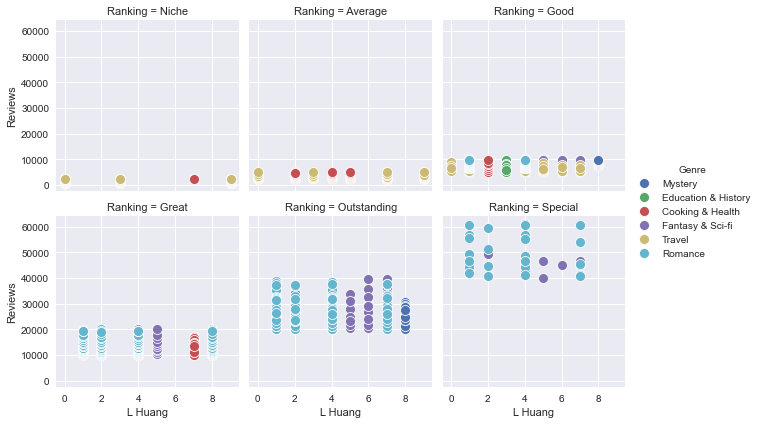

In [275]:
grid = sea.FacetGrid(booksmode, col = "Ranking" , hue = "Genre", col_wrap = 3)
grid.map(sea.scatterplot,"L Huang", "Reviews",s = 100)
grid.add_legend()

In [276]:
protobook = booksort.copy()
protobook.head()

,Title,Date Published,Reviews,Author(s),Genre,Type,Format,Ranking
0,Deadly Fallout (Detective Zoe Finch),2021,7767,Rachel McLean,Mystery,Fiction,Paperback,Good
1,Longstone: A DCI Ryan Mystery (The DCI Ryan My...,2018,7792,LJ Ross,Mystery,Fiction,Audio CD,Good
2,Next to Last Stand: A Longmire Mystery,2021,7751,Craig Johnson,Mystery,Fiction,Hardcover,Good
3,"Swansong (DI Nick Dixon Crime, 4)",2015,7762,Damien Boyd,Mystery,Non Fiction,Paperback,Good
4,Piece of My Heart (An Under Suspicion Novel),2021,7712,Mary Higgins Clark,Mystery,Fiction,Audio CD,Good


In [289]:
transformer = PowerTransformer(method = 'box-cox') #Box-cox because we only have positive values
protor = transformer.fit_transform(np.array(protobook.Reviews).reshape(-1, 1)) #Normalizing Reviews Column

protor

array([[0.37274533],
       [0.37593842],
       [0.37069708],
       ...,
       [2.38642798],
       [2.38384609],
       [2.35294679]])

In [342]:
protonorm = protobook.copy() #Copy for Normalized Version
protonorm["Reviews"] = protor

In [335]:
#Index of each column to pass into algorithm

cg = [0, 3, 4, 5, 6, 7]
cg

[0, 3, 4, 5, 6, 7]

In [322]:
protocao = KPrototypes(n_clusters = 8, init = "Cao") #Chooses densest points for Centroids
protohuang = KPrototypes(n_clusters = 8, init = "Huang") #Chooses random points for Centroids

In [337]:
pc = protocao.fit_predict(protobook, categorical = cg) #These will take time 
ph = protohuang.fit_predict(protobook, categorical = cg)

In [343]:
nc = protocao.fit_predict(protonorm, categorical = cg) #These will take time 
nh = protohuang.fit_predict(protonorm, categorical = cg)

In [341]:
pc

array([5, 5, 5, ..., 7, 7, 7], dtype=uint16)

In [339]:
ph

array([4, 4, 4, ..., 1, 1, 1], dtype=uint16)

In [344]:
nc

array([0, 4, 3, ..., 3, 0, 7], dtype=uint16)

In [345]:
nh

array([2, 2, 2, ..., 0, 0, 2], dtype=uint16)

In [346]:
protobook["Prototype C"] = pc
protobook["Prototype H"] = ph
protonorm["Prototype C"] = rc
protonorm["Prototype H"] = rh

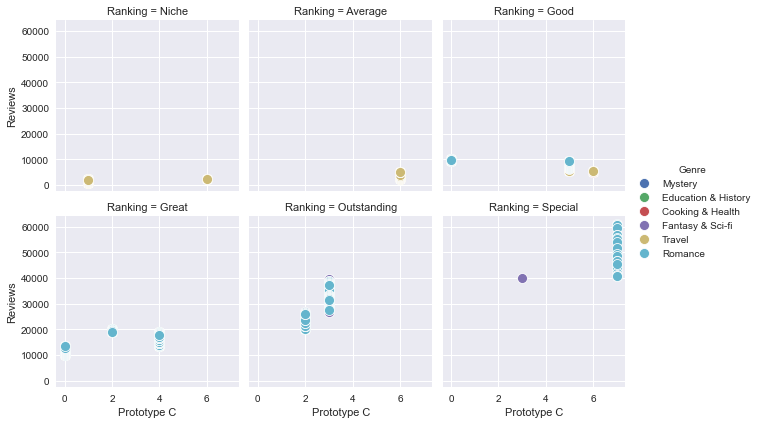

In [355]:
grid = sea.FacetGrid(protobook, col = "Ranking" , hue = "Genre", col_wrap = 3)
grid.map(sea.scatterplot,"Prototype C","Reviews", s = 100)
grid.add_legend()